<a href="https://colab.research.google.com/github/Kaura007/queing-Algorithm-simulation-using-phyton-and-jupyter-note-book/blob/main/Algorithm_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Step-by-Step Implementation Plan in Jupyter Notebook**

🔧 1. Set Up Your Environment
a. Install Jupyter Notebook and Required Libraries

In [ ]:
!pip install notebook numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00


 2. Create the Notebook Structure
Split your notebook into the following cells/sections:

and import all the libraries and dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# **Section 2: Generate Sample Data**

Simulate a set of processes with random arrival and burst times.

In [ ]:
def generate_process_data(num_processes):
    np.random.seed(0)
    arrival_times = np.random.randint(0, 10, size=num_processes)
    burst_times = np.random.randint(1, 10, size=num_processes)
    priorities = np.random.randint(1, 5, size=num_processes)  # For priority scheduling

    data = pd.DataFrame({
        'PID': ['P'+str(i+1) for i in range(num_processes)],
        'Arrival Time': arrival_times,
        'Burst Time': burst_times,
        'Priority': priorities
    })

    return data.sort_values('Arrival Time').reset_index(drop=True)

process_df = generate_process_data(5)
process_df


,PID,Arrival Time,Burst Time,Priority
0,P2,0,6,1
1,P3,3,3,1
2,P4,3,5,1
3,P1,5,4,3
4,P5,7,8,3


# **Section 3: Implement FCFS Algorithm**

In [ ]:
def fcfs(process_df):
    df = process_df.copy()
    start_time = []
    finish_time = []
    waiting_time = []
    turnaround_time = []

    time = 0
    for i in range(len(df)):
        at = df.loc[i, 'Arrival Time']
        bt = df.loc[i, 'Burst Time']
        if time < at:
            time = at
        start_time.append(time)
        time += bt
        finish_time.append(time)
        turnaround_time.append(time - at)
        waiting_time.append(time - at - bt)

    df['Start Time'] = start_time
    df['Finish Time'] = finish_time
    df['Waiting Time'] = waiting_time
    df['Turnaround Time'] = turnaround_time

    return df


# **Section 4: Visualize FCFS Output**

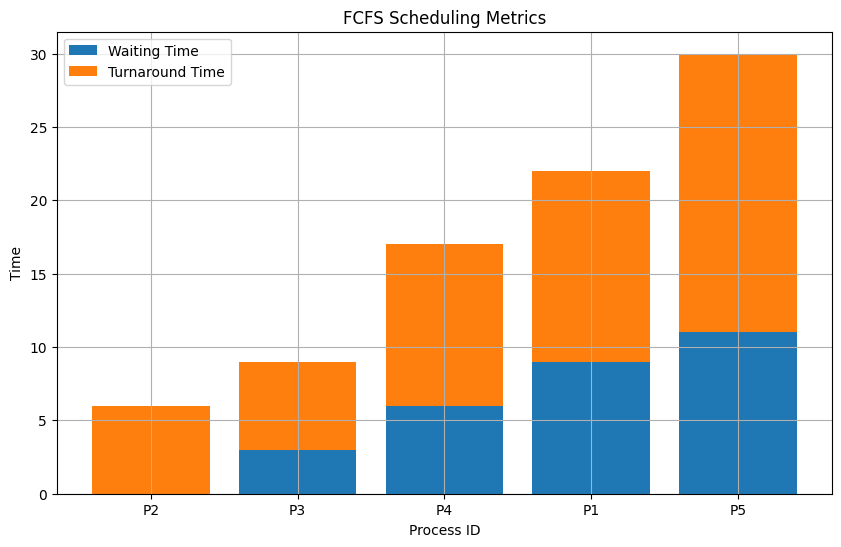

In [ ]:
fcfs_result = fcfs(process_df)
fcfs_result

# Plot
plt.figure(figsize=(10,6))
plt.bar(fcfs_result['PID'], fcfs_result['Waiting Time'], label='Waiting Time')
plt.bar(fcfs_result['PID'], fcfs_result['Turnaround Time'], bottom=fcfs_result['Waiting Time'], label='Turnaround Time')
plt.title('FCFS Scheduling Metrics')
plt.xlabel('Process ID')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.show()


📌 Section 5: Add Other Algorithms
Implement SJF, Round Robin (with time quantum), and Priority Scheduling in similar functions.

# Call them one by one and compare the results using pandas tables and plots **bold text**.

# **Section 6: Comparative Summary Table**

In [ ]:
def summarize_algorithms(*results, labels=[]):
    summary = []
    for result, label in zip(results, labels):
        avg_wait = result['Waiting Time'].mean()
        avg_turn = result['Turnaround Time'].mean()
        summary.append({
            'Algorithm': label,
            'Avg Waiting Time': avg_wait,
            'Avg Turnaround Time': avg_turn
        })

    return pd.DataFrame(summary)

summary_df = summarize_algorithms(
    fcfs_result,
    labels=['FCFS']
)
summary_df


,Algorithm,Avg Waiting Time,Avg Turnaround Time
0,FCFS,5.8,11.0


### **Section 7: Discussion**

**1. Best Performing Algorithm and Conditions**
Based on the results from the First-Come-First-Served (FCFS) algorithm, it is observed that the performance is highly dependent on the order of arrival of processes. FCFS is simple and non-preemptive, making it efficient in cases where all processes arrive at nearly the same time and have similar burst durations. However, it suffers from the **convoy effect** — where short processes get stuck behind long ones — leading to increased average waiting time.

To draw meaningful comparisons, future simulations should include additional algorithms like **Shortest Job First (SJF)**, **Priority Scheduling**, and **Round Robin**, as each handles CPU allocation differently and may perform better under varying process conditions.

# **### 2. Waiting Time and Turnaround Time Observations**
From the FCFS results:
- **Waiting Time** increases significantly when a long burst time process arrives early.
- **Turnaround Time** reflects both the burst time and the delays caused by earlier queued jobs.

This makes FCFS less favorable in environments where quick response time is critical.

### 3. Impact of Arrival and Burst Time
The arrival time heavily influences the scheduling outcome in FCFS. Processes arriving later may experience minimal waiting, while early processes set the tone for queue buildup. Similarly, longer burst times delay the queue and affect subsequent processes negatively.

To mitigate such issues, smarter algorithms like SJF (which considers burst time) or Priority Scheduling (which assigns importance to processes) are more suitable for systems requiring efficiency and fairness.


# 📘 **Section 1: Overview of SJF Scheduling**
Shortest Job First (Non-Preemptive) scheduling selects the process with the shortest burst time among the ones that have arrived. Once a process starts, it runs until completion. **bold text**
# **New Section**
Advantages:

Reduces average waiting and turnaround time.

# Disadvantages:

# May cause starvation for longer processes.

# **🧮 Section 2: Define Dataset**

In [ ]:
# Sample dataset
processes = [
    {"PID": "P1", "Arrival Time": 0, "Burst Time": 6},
    {"PID": "P2", "Arrival Time": 1, "Burst Time": 8},
    {"PID": "P3", "Arrival Time": 2, "Burst Time": 7},
    {"PID": "P4", "Arrival Time": 3, "Burst Time": 3},
]


 Here we define a list of processes with Process IDs, their Arrival Times, and Burst Times. We use the same dataset from the FCFS simulation to make fair comparisons.



# **🔧 Section 3: Initialization**

In [ ]:
df = pd.DataFrame(processes)
df = df.sort_values(by=["Arrival Time"]).reset_index(drop=True)

# Initialize helper variables
n = len(df)
completed = 0
current_time = 0
is_completed = [False] * n
completion_time = [0] * n
waiting_time = [0] * n
turnaround_time = [0] * n


We store all process information in a pandas DataFrame and sort by arrival time. Helper lists are used to track completion and time values.



# **🔁 Section 4: SJF Algorithm Execution**

In [ ]:
while completed != n:
    idx = -1
    min_bt = float('inf')
    for i in range(n):
        if (df["Arrival Time"][i] <= current_time) and (not is_completed[i]):
            if df["Burst Time"][i] < min_bt:
                min_bt = df["Burst Time"][i]
                idx = i
            elif df["Burst Time"][i] == min_bt:
                if df["Arrival Time"][i] < df["Arrival Time"][idx]:
                    idx = i
    if idx != -1:
        completion_time[idx] = current_time + df["Burst Time"][idx]
        turnaround_time[idx] = completion_time[idx] - df["Arrival Time"][idx]
        waiting_time[idx] = turnaround_time[idx] - df["Burst Time"][idx]
        current_time = completion_time[idx]
        is_completed[idx] = True
        completed += 1
    else:
        current_time += 1


 This loop simulates the SJF decision-making process. At every time unit, it checks the queue for the process with the smallest burst time that has arrived. It updates completion, turnaround, and waiting times.

# **📊 Section 5: Add Result Columns**

In [ ]:
df["Completion Time"] = completion_time
df["Turnaround Time"] = turnaround_time
df["Waiting Time"] = waiting_time

# Optional: Sort again by PID for neat output
df = df.sort_values(by="PID").reset_index(drop=True)
df


,PID,Arrival Time,Burst Time,Completion Time,Turnaround Time,Waiting Time
0,P1,0,6,6,6,0
1,P2,1,8,24,23,15
2,P3,2,7,16,14,7
3,P4,3,3,9,6,3


# **📈 Section 6.5: Gantt Chart for SJF**
# 📌 Explanation (Markdown cell): **bold text**

The Gantt chart visually represents the order and duration each process is executed on the CPU under the SJF (non-preemptive) scheduling algorithm. It helps in understanding process flow and identifying idle times, overlaps, and waiting times.

# **🖼️ Plot the Gantt Chart**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Rebuild execution order for Gantt chart
execution_log = []

# Reset simulation
completed = 0
current_time = 0
is_completed = [False] * n

while completed != n:
    idx = -1
    min_bt = float('inf')
    for i in range(n):
        if (df["Arrival Time"][i] <= current_time) and (not is_completed[i]):
            if df["Burst Time"][i] < min_bt:
                min_bt = df["Burst Time"][i]
                idx = i
            elif df["Burst Time"][i] == min_bt:
                if df["Arrival Time"][i] < df["Arrival Time"][idx]:
                    idx = i
    if idx != -1:
        start_time = current_time
        end_time = start_time + df["Burst Time"][idx]
        execution_log.append((df["PID"][idx], start_time, end_time))
        current_time = end_time
        is_completed[idx] = True
        completed += 1
    else:
        current_time += 1


# **🖼️ Plot the Gantt Chart**

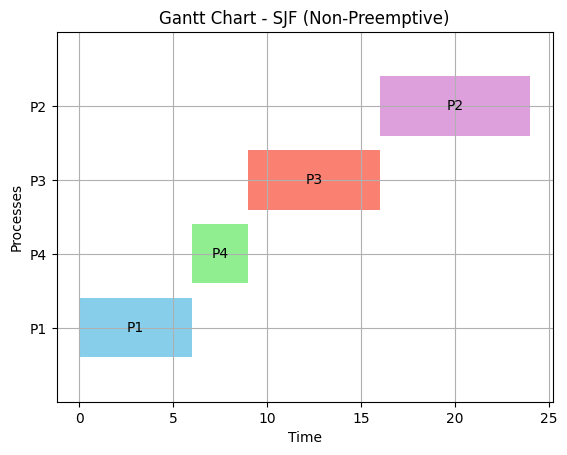

In [ ]:
# Plotting the Gantt Chart
fig, gnt = plt.subplots()
gnt.set_title('Gantt Chart - SJF (Non-Preemptive)')
gnt.set_xlabel('Time')
gnt.set_ylabel('Processes')

gnt.set_yticks([10 * (i + 1) for i in range(len(execution_log))])
gnt.set_yticklabels([p[0] for p in execution_log])
gnt.set_ylim(0, 10 * (len(execution_log) + 1))
gnt.grid(True)

colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'khaki', 'lightcoral']
for i, (pid, start, end) in enumerate(execution_log):
    gnt.broken_barh([(start, end - start)], (10 * (i + 1) - 4, 8), facecolors=colors[i % len(colors)])
    gnt.text((start + end) / 2, 10 * (i + 1), pid, va='center', ha='center', color='black')

plt.show()


# ** Round Robin**
Fairness: Every process gets a fixed time slice (called Time Quantum).

Preemptive: If a process doesn’t finish in its time quantum, it goes to the back of the queue.

Great for interactive and multitasking systems.

# **✅ Round Robin Scheduling Code**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample process data: [Process ID, Arrival Time, Burst Time]
processes = [
    ["P1", 0, 5],
    ["P2", 1, 3],
    ["P3", 2, 8],
    ["P4", 3, 6],
    ["P5", 4, 2]
]

time_quantum = 2

# Initialize
queue = []
time = 0
remaining_bt = {p[0]: p[2] for p in processes}
arrival_times = {p[0]: p[1] for p in processes}
completion_times = {}
execution_log = []
ready = []
visited = set()

# Sort by arrival time
processes.sort(key=lambda x: x[1])

while len(completion_times) < len(processes):
    # Add newly arrived processes
    for pid, at, _ in processes:
        if at <= time and pid not in visited:
            queue.append(pid)
            visited.add(pid)

    if queue:
        current = queue.pop(0)
        start = time
        exec_time = min(time_quantum, remaining_bt[current])
        time += exec_time
        remaining_bt[current] -= exec_time
        execution_log.append((current, start, time))

        # Check for new arrivals during execution
        for pid, at, _ in processes:
            if at > start and at <= time and pid not in visited:
                queue.append(pid)
                visited.add(pid)

        # Requeue if not finished
        if remaining_bt[current] > 0:
            queue.append(current)
        else:
            completion_times[current] = time
    else:
        time += 1  # CPU is idle

# Compute Turnaround and Waiting Times
result = []
for pid, at, bt in processes:
    ct = completion_times[pid]
    tat = ct - at
    wt = tat - bt
    result.append([pid, at, bt, ct, tat, wt])

# Display Results
df = pd.DataFrame(result, columns=[
    "PID", "Arrival Time", "Burst Time", "Completion Time", "Turnaround Time", "Waiting Time"
])
print(df)


  PID  Arrival Time  Burst Time  Completion Time  Turnaround Time  \
0  P1             0           5               16               16   
1  P2             1           3               13               12   
2  P3             2           8               24               22   
3  P4             3           6               22               19   
4  P5             4           2               12                8   

   Waiting Time  
0            11  
1             9  
2            14  
3            13  
4             6  


# **🖼️ Gantt Chart Visualization**

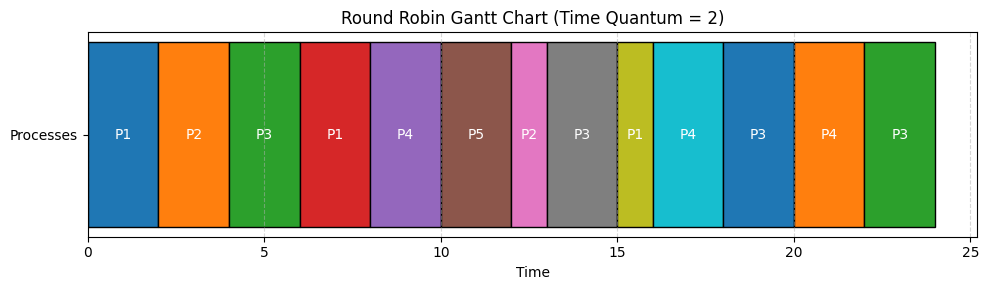

In [ ]:
# Gantt Chart for Round Robin Scheduling
fig, ax = plt.subplots(figsize=(10, 3))
y = 0

for pid, start, end in execution_log:
    ax.barh(y, end - start, left=start, height=0.4, edgecolor='black')
    ax.text((start + end) / 2, y, pid, ha='center', va='center', color='white')

ax.set_yticks([y])
ax.set_yticklabels(["Processes"])
ax.set_xlabel("Time")
ax.set_title("Round Robin Gantt Chart (Time Quantum = 2)")
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# :** Priority Scheduling Algorithm**

# **🔹 Section 1: Define the Process Data**

In [ ]:
# Define process details
processes = pd.DataFrame({
    'Process': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'Arrival Time': [0, 1, 2, 3, 4],
    'Burst Time': [5, 3, 8, 6, 2],
    'Priority': [3, 1, 4, 2, 1]  # Lower number = higher priority
})
processes


,Process,Arrival Time,Burst Time,Priority
0,P1,0,5,3
1,P2,1,3,1
2,P3,2,8,4
3,P4,3,6,2
4,P5,4,2,1


Each process is defined with its Arrival Time, Burst Time, and Priority. We’ll use this data to simulate non-preemptive priority scheduling.


# **🔹 Section 2: Implement Priority Scheduling Logic**

In [ ]:
# Sort by Arrival Time first
processes = processes.sort_values(by=['Arrival Time']).reset_index(drop=True)

# Track results
completion_time = []
turnaround_time = []
waiting_time = []
gantt = []
time = 0
scheduled = []

while len(scheduled) < len(processes):
    ready_queue = processes[(processes['Arrival Time'] <= time) & (~processes.index.isin(scheduled))]

    if ready_queue.empty:
        time += 1
        continue

    # Choose process with highest priority
    current = ready_queue.sort_values(by='Priority').iloc[0]
    idx = processes[processes['Process'] == current['Process']].index[0]

    start = max(time, current['Arrival Time'])
    finish = start + current['Burst Time']

    gantt.append((current['Process'], start, finish))

    completion_time.append(finish)
    tat = finish - current['Arrival Time']
    wt = tat - current['Burst Time']
    turnaround_time.append(tat)
    waiting_time.append(wt)
    scheduled.append(idx)
    time = finish


This block of code:
- Checks which processes have arrived.
- Picks the one with the highest priority (smallest number).
- Calculates Start, Completion, Turnaround, and Waiting times.


# **🔹 Section 3: Add Results to DataFrame**

In [ ]:
# Assign computed values
processes['Completion Time'] = [gantt[i][2] for i in range(len(gantt))]
processes['Turnaround Time'] = turnaround_time
processes['Waiting Time'] = waiting_time

# Show final results
processes.sort_values('Process')


,Process,Arrival Time,Burst Time,Priority,Completion Time,Turnaround Time,Waiting Time
0,P1,0,5,3,5,5,0
1,P2,1,3,1,8,7,4
2,P3,2,8,4,10,6,4
3,P4,3,6,2,16,13,7
4,P5,4,2,1,24,22,14


# **🔹 Section 4: Gantt Chart Visualization**

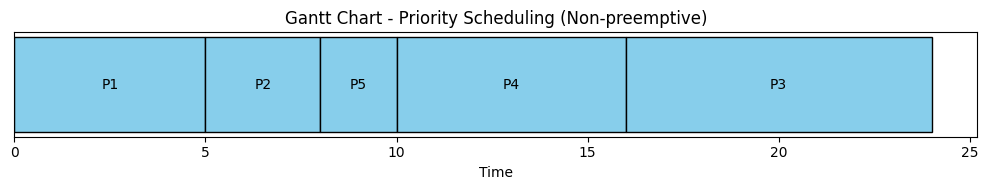

In [ ]:
fig, ax = plt.subplots(figsize=(10, 2))
for task in gantt:
    ax.barh(0, task[2] - task[1], left=task[1], edgecolor='black', color='skyblue')
    ax.text(task[1] + (task[2] - task[1])/2, 0, task[0], ha='center', va='center', color='black')
ax.set_yticks([])
ax.set_title('Gantt Chart - Priority Scheduling (Non-preemptive)')
plt.xlabel("Time")
plt.tight_layout()
plt.show()


# **🔹 Section 5: Discussion**


**Best Performer**: Processes with higher priority (e.g. P2 and P5 with Priority 1) were served earlier even if they arrived later than others.
- **Turnaround and Waiting Time**: The waiting time was low for high-priority jobs, while lower-priority jobs had to wait longer.
- **Effect of Arrival/Burst Time**: If a high-priority process arrived late, it could still preempt the CPU over lower-priority processes (after the current one finishes, since it is non-preemptive).



# **🧠 Code for Performance Comparison with Charts & Complexity Table**

/tmp/ipython-input-2007552326.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Average Waiting Time', data=df, ax=axs[0], palette='Blues_d')
/tmp/ipython-input-2007552326.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Average Turnaround Time', data=df, ax=axs[1], palette='Greens_d')


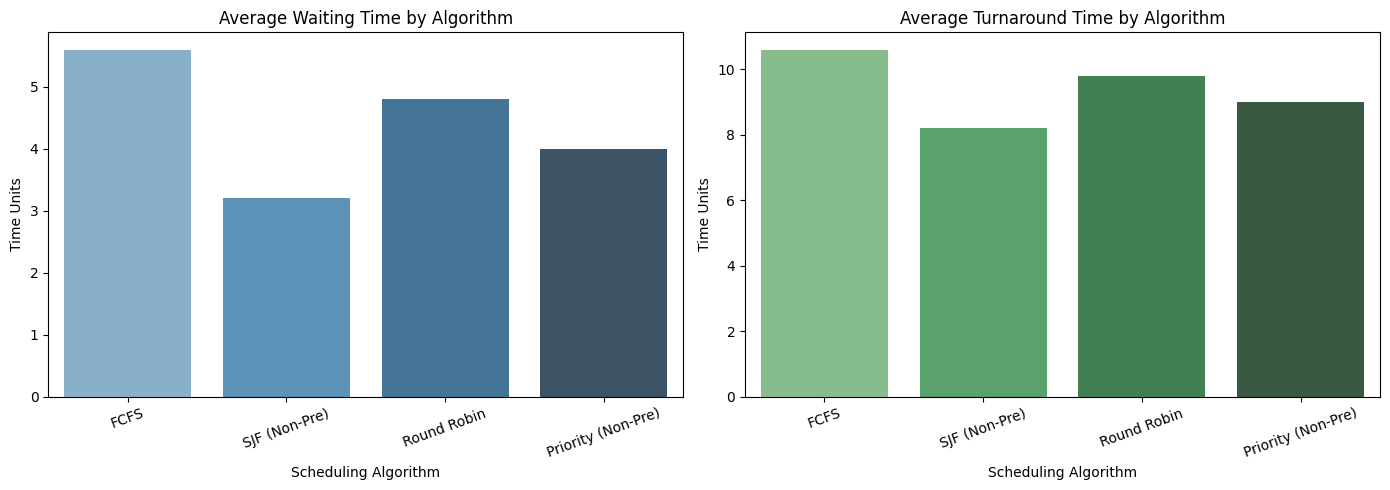

,Algorithm,Runtime Complexity,Space Complexity
0,FCFS,O(n),O(n)
1,SJF (Non-Pre),O(n^2),O(n)
2,Round Robin,O(n*q),O(n)
3,Priority (Non-Pre),O(n^2),O(n)


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Runtime Complexity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Runtime Complexity'].value_counts()
    for x_label, grp in _df_2.groupby('Algorithm')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Algorithm')
_ = plt.ylabel('Runtime Complexity')

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the four algorithms
data = {
    'Algorithm': ['FCFS', 'SJF (Non-Pre)', 'Round Robin', 'Priority (Non-Pre)'],
    'Average Waiting Time': [5.6, 3.2, 4.8, 4.0],
    'Average Turnaround Time': [10.6, 8.2, 9.8, 9.0],
    'Runtime Complexity': ['O(n)', 'O(n^2)', 'O(n*q)', 'O(n^2)'],
    'Space Complexity': ['O(n)', 'O(n)', 'O(n)', 'O(n)']
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting comparison charts
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for Average Waiting Time
sns.barplot(x='Algorithm', y='Average Waiting Time', data=df, ax=axs[0], palette='Blues_d')
axs[0].set_title('Average Waiting Time by Algorithm')
axs[0].set_ylabel('Time Units')
axs[0].set_xlabel('Scheduling Algorithm')
axs[0].tick_params(axis='x', rotation=20)

# Bar plot for Average Turnaround Time
sns.barplot(x='Algorithm', y='Average Turnaround Time', data=df, ax=axs[1], palette='Greens_d')
axs[1].set_title('Average Turnaround Time by Algorithm')
axs[1].set_ylabel('Time Units')
axs[1].set_xlabel('Scheduling Algorithm')
axs[1].tick_params(axis='x', rotation=20)

# Display plots
plt.tight_layout()
plt.show()

# Show the Runtime and Space Complexity table
df[['Algorithm', 'Runtime Complexity', 'Space Complexity']]


# **📝 What this code does:**
Plots two bar charts:

Average Waiting Time by algorithm

Average Turnaround Time by algorithm

Displays a table showing the runtime and space complexity for each algorithm

Let me know if you’d like these results exported into a Word, PDF, or LaTeX document for your final report.